In [1]:
import os
import plotly.graph_objects as go

In [2]:
colors = {
    'ai_dark_gray': '#808080',      # Standard gray
    'manual_work': '#FFD700',       # Strong, saturated yellow
    'treatment_blue': '#1f77b4',    # Blue for treatment (unchanged)
    'control_orange': '#ff7f0e'     # Orange for control (unchanged)
}

# Create a Sankey diagram of how Task 1 solutions were assigned to Task 2 participants

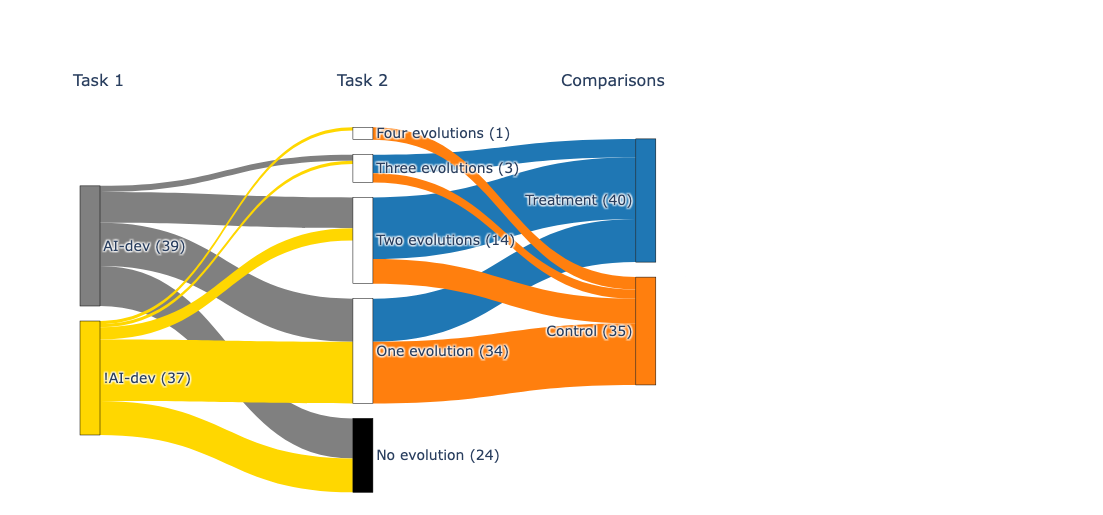

In [3]:
# Create the folder if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Labels for all nodes
labels = [
    "AI-dev (39)", "!AI-dev (37)",       # 0, 1
    "Four evolutions (1)", "Three evolutions (3)", "Two evolutions (14)", "One evolution (34)", "No evolution (24)",  # 2–6
    "Treatment (40)", "Control (35)"     # 7, 8
]

# Coordinates for layout (manual y for vertical alignment)
y_positions = [
    0.5, 0.5,   # AI-dev, !AI-dev
    0.1, 0.2, 0.4, 0.6, 0.8,  # Task 2 buckets (4→0)
    0.3, 0.6    # Treatment, Control
]

x_positions = [
    0.0, 0.0,   # AI-dev, !AI-dev
    0.3, 0.3, 0.3, 0.3, 0.3,  # Task 2 buckets
    0.6, 0.6    # Treatment, Control
]

# Flow from AI-dev (0) to Task 2 buckets (2–6)
sources = [0, 0, 0, 0, 0]
targets = [6, 5, 4, 3, 2]
values  = [13, 14, 10, 2, 0]

# Flow from !AI-dev (1) to Task 2 buckets
sources += [1, 1, 1, 1, 1]
targets += [6, 5, 4, 3, 2]
values  += [11, 20, 4, 1, 1]

# Flow from Task 2 buckets to Treatment (7) and Control (8)
sources += [6, 6, 5, 5, 4, 4, 3, 3, 2]
targets += [7, 8, 7, 8, 7, 8, 7, 8, 8]
values  += [0, 0, 14, 20, 20, 8, 6, 3, 4]

# Define colors for links for better traceability
link_colors = (
    [colors['ai_dark_gray']] * 5 +    # AI-dev to Task 2 buckets
    [colors['manual_work']] * 5 +    # !AI-dev to Task 2 buckets
    ["#2ca02c", "#2ca02c", colors['treatment_blue'], colors['control_orange'], colors['treatment_blue'], colors['control_orange'], 
     colors['treatment_blue'], colors['control_orange'], colors['control_orange']]
)

# Node colors
node_colors = [
    colors['ai_dark_gray'], colors['manual_work'],       # AI-dev, !AI-dev
    "#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#000000",  # Task 2 buckets
    colors['treatment_blue'], colors['control_orange']        # Treatment, Control
]

# Build the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors,
        x=x_positions,
        y=y_positions
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])

fig.add_annotation(
    x=0.02, y=1.02, text="Task 1",
    showarrow=False, font=dict(size=16),
    xanchor="center", yanchor="bottom"
)

fig.add_annotation(
    x=0.3, y=1.02, text="Task 2",
    showarrow=False, font=dict(size=16),
    xanchor="center", yanchor="bottom"
)

fig.add_annotation(
    x=0.565, y=1.02, text="Comparisons",
    showarrow=False, font=dict(size=16),
    xanchor="center", yanchor="bottom"
)

fig.update_layout(font_size=14, width=1600, height=500)
fig.show()

# Save figure as HTML
fig.write_html("figures/sankey_ai_dev_outcomes.html")